# **Kaggle Connection and Fetching the Dataset**


In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp /content/drive/MyDrive/Kaggle_API/kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download lburleigh/asap-2-0

Dataset URL: https://www.kaggle.com/datasets/lburleigh/asap-2-0
License(s): Attribution 4.0 International (CC BY 4.0)
  0% 0.00/22.0M [00:00<?, ?B/s]
100% 22.0M/22.0M [00:00<00:00, 637MB/s]


In [ ]:
! unzip asap-2-0.zip

Archive:  asap-2-0.zip
  inflating: ASAP2_train_sourcetexts.csv  


# **API Keys**

In [ ]:
from google.colab import userdata
api_key_gpt = userdata.get('GPT_KEY')
llama_api_key=userdata.get('GROQ_KEY')
gemini_2.5_pro_api=userdata.get('Gemini2.5pro')

# **Implementation**

## Installing Libraries

In [ ]:
!pip install langgraph
!pip install pydantic
!pip install -U langchain-groq langchain-openai langchain requests
!pip install grandalf

#! pip install langchain-groq
#! pip install langchain-xai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 860.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 151.8/151.8 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.9/43.9 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.6/50.6 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.5/216.5 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 844.7 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.8/64.8 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.1/131.1 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.32.3
    Uninstalling requests-2.32.3:
      Successfully uninstalled requests-2.32.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires

In [ ]:
! pip install langchain-groq
! pip install langchain-xai

## Importing the Dataset

In [ ]:
import pandas as pd

In [ ]:
source_df = pd.read_csv('/content/ASAP2_train_sourcetexts 2.csv')
print(len(source_df))

24728


## Checking the Dataset Details

In [ ]:
# write down all unique prompt names in the dataset
source_df['prompt_name'].unique()

array(['Exploring Venus', 'Facial action coding system',
       'The Face on Mars', '"A Cowboy Who Rode the Waves"',
       'Driverless cars', 'Does the electoral college work?',
       'Car-free cities'], dtype=object)

In [ ]:
source_df['assignment'].unique()

array(['In "The Challenge of Exploring Venus," the author suggests studying Venus is a worthy pursuit despite the dangers it presents. Using details from the article, write an essay evaluating how well the author supports this idea. Be sure to include: a claim that evaluates how well the author supports the idea that studying Venus is a worthy pursuit despite the dangers; an explanation of the evidence from the article that supports your claim; an introduction, a body, and a conclusion to your essay.',
       'In the article "Making Mona Lisa Smile," the author describes how a new technology called the Facial Action Coding System enables computers to identify human emotions. Using details from the article, write an essay arguing whether the use of this technology to read the emotional expressions of students in a classroom is valuable.',
       "You have read the article 'Unmasking the Face on Mars.' Imagine you are a scientist at NASA discussing the Face with someone who thinks it was

In [ ]:
source_df.head(3)

,essay_id,score,full_text,assignment,prompt_name,economically_disadvantaged,student_disability_status,ell_status,race_ethnicity,gender,source_text_1,source_text_2,source_text_3,source_text_4
0,AAAVUP14319000159574,4,The author suggests that studying Venus is wor...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,Black/African American,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
1,AAAVUP14319000159542,2,NASA is fighting to be alble to to go to Venus...,"In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Not economically disadvantaged,Not identified as having disability,No,Hispanic/Latino,F,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN
2,AAAVUP14319000159461,3,"""The Evening Star"", is one of the brightest po...","In ""The Challenge of Exploring Venus,"" the aut...",Exploring Venus,Economically disadvantaged,Identified as having disability,No,White,M,"The Challenge of Exploring Venus\nVenus, somet...",NaN,NaN,NaN


In [ ]:
df=source_df[source_df['prompt_name'] == 'The Face on Mars']
# total number of rows of df
print(len(df))


3015


In [ ]:
df['assignment'].unique()

array(["You have read the article 'Unmasking the Face on Mars.' Imagine you are a scientist at NASA discussing the Face with someone who thinks it was created by aliens. Using information in the article, write an argumentative essay to convince someone that the Face is just a natural landform.Be sure to include: claims to support your argument that the Face is a natural landform; evidence from the article to support your claims; an introduction, a body, and a conclusion to your argumentative essay."],
      dtype=object)

## Filtering the Dataset for the Project

In [ ]:
student_essays=df.full_text.values.tolist()[:100]
ground_truth_df=df[['score']]
ground_truth_df=ground_truth_df.reset_index(drop=True)
ground_truth_df=ground_truth_df.rename({'score':'Grading_Prompt'},axis=1)
ground_truth_df=ground_truth_df[:100]
ground_truth=ground_truth_df['Grading_Prompt'].values.tolist()

## Main Implementation

In [ ]:
from __future__ import annotations

import re
import time
from typing import Dict, List, Tuple, Literal

import pandas as pd
from pydantic import BaseModel, Field, ConfigDict
from sklearn.metrics import mean_squared_error

from langgraph.graph import StateGraph, END
from langchain_groq import ChatGroq
from langchain_openai import ChatOpenAI
from langchain.prompts import PromptTemplate
from langchain.chains import LLMChain

#from langchain_xai import ChatXAI

In [ ]:
###############################################################################
# ----------------------------   STATE  MODEL    --------------------------- #
###############################################################################
class EssayState(BaseModel):
    model_config = ConfigDict(arbitrary_types_allowed=True)
    essays: List[str]
    ground_truth: pd.DataFrame
    prompts: Dict[str, str]

    preds: Dict[str, List[float]] = Field(default_factory=dict)
    misclassified_df: pd.DataFrame | None = None
    best_prompts: Dict[str, str] | None = None
    min_misclassified: int = Field(default_factory=lambda: 10 ** 9)
    iteration: int = 0

    groq_key: str
    openai_key: str

In [ ]:
###############################################################################
# ----------------------------  LLM NODE: GRADER --------------------------- #
###############################################################################

def node_grade(state: EssayState) -> EssayState:
    """Agent‑1: grade every essay for every rubric key using current prompts."""
    llm = ChatGroq(groq_api_key=state.groq_key, model_name="llama3-70b-8192")
    #llm = ChatXAI(groq_api_key=state.xai_key, model_name="grok-3")

    template = PromptTemplate.from_template("{prompt}\n\nStudent Essay:\n{essay}\n\nScore :")
    chain = LLMChain(llm=llm, prompt=template)

    preds: Dict[str, List[float]] = {k: [] for k in state.prompts}

    for idx, essay in enumerate(state.essays):
        for rubric_key, prompt in state.prompts.items():
            try:
                result = chain.run(prompt=prompt, essay=essay)
                match = re.search(r"[-+]?\d*\.\d+|\d+", result)
                score = float(match.group()) if match else 0.0
            except Exception as e:
                print(f"[Grader] Error: {e}")
                score = 0.0
            preds[rubric_key].append(score)

    state.preds = preds
    return state

In [ ]:
###############################################################################
# ----------------------------  EVALUATE NODE  ----------------------------- #
###############################################################################

def node_evaluate(state: EssayState) -> EssayState:
    gt = state.ground_truth
    logs = []
    for key in state.prompts:
        y_true = gt[key].tolist()
        y_pred = state.preds[key]
        mse = mean_squared_error(y_true, y_pred)
        rmse = mse ** 0.5
        print(f"[Iter {state.iteration}] RMSE for {key}: {rmse:.4f}")

        for i, (t, p) in enumerate(zip(y_true, y_pred)):
            if abs(p - t) > 0.5:
                logs.append({
                    "essay_id": i + 1,
                    "essay": state.essays[i],
                    "rubric": key,
                    "prompt_used": state.prompts[key],
                    "predicted_score": p,
                    "actual_score": t,
                })

    mis_df = pd.DataFrame(logs)
    print(f"[Iter {state.iteration}] Misclassified essays: {len(mis_df)}")

    state.misclassified_df = mis_df
    if len(mis_df) < state.min_misclassified:
        state.min_misclassified = len(mis_df)
        state.best_prompts = state.prompts.copy()
    state.iteration += 1
    return state

In [ ]:
###############################################################################
# ----------------------------  REFINE PROMPT  ----------------------------- #
###############################################################################

def node_refine_prompt(state: EssayState) -> EssayState:
    if state.misclassified_df is None or state.misclassified_df.empty:
        return state

    refiner = ChatOpenAI(model="gpt-4o", api_key=state.openai_key)
    #refiner = ChatXAI(model="grok-3", api_key=state.xai_key)

    refine_template = PromptTemplate.from_template(
        "Here is evaluation criteria:\n{orig_prompt}\n\n"
        "and here are student essays with their scores given by humans\n{essay_blocks}\n\n"
        "study deeply the answers and the gradings and write a prompt that can mimics human grading scores which can be given to an LLM for performing grading. The prompt shouldn't be large and only return the prompt."
    )
    refine_chain = LLMChain(llm=refiner, prompt=refine_template)

    essay_blocks = "\n\n".join([
        f"Essay:\n{row['essay']}\nCorrect Answer: {row['actual_score']}"
        for _, row in state.misclassified_df.iterrows()
    ])

    orig_prompt = state.misclassified_df.iloc[0]["prompt_used"]
    new_prompt_text = refine_chain.run(orig_prompt=orig_prompt, essay_blocks=essay_blocks).strip()

    key = list(state.prompts.keys())[0]
    state.prompts[key] = new_prompt_text
    print(f"[Iter {state.iteration}] New prompt:\n---\n{new_prompt_text}\n---")
    return state

In [ ]:
###############################################################################
# ----------------------------  CONDITIONAL LOOP -------------------------- #
###############################################################################

def should_continue(state: EssayState, *, max_iters: int) -> Literal["refine", "stop"]:
    if state.iteration >= max_iters:
        print("Reached max iterations — stopping.")
        return "stop"
    if state.misclassified_df is not None and len(state.misclassified_df) == 0:
        print("Perfect classification achieved — stopping.")
        return "stop"
    return "refine"

###############################################################################
# ----------------------------  BUILD GRAPH     --------------------------- #
###############################################################################

def build_graph(max_iters: int = 5):
    sg = StateGraph(EssayState)

    sg.add_node("grade", node_grade)
    sg.add_node("evaluate", node_evaluate)
    sg.add_node("refine", node_refine_prompt)

    sg.set_entry_point("grade")
    sg.add_edge("grade", "evaluate")
    sg.add_conditional_edges(
        "evaluate",
        lambda s: should_continue(s, max_iters=max_iters),
        {"refine": "refine", "stop": END}
    )
    sg.add_edge("refine", "grade")

    return sg.compile()


## Calling Everything

In [ ]:
if __name__ == "__main__":
    # ✅ Sample evaluation prompt (can be expanded later)
    evaluation_prompt = {"Grading_Prompt":'''Evaluate whether the essay clearly introduces the topic and states the position that the 'Face on Mars' is a natural landform and not created by aliens.
- 0.5 point: Simple introduction of what would be discussed.
- 0 points: missing or unclear.

Evaluate whether the student provides a logical claims that support the argument that the 'Face on Mars' is a natural landform and not created by aliens
Logical Claims might include:
- Optical illusion from shadows and light
- Pareidolia: brain sees faces in random patterns
- High-resolution images reveal no face
- Viking 1 photo was misleading due to resolution

Provide marks based on following criteria:
- 1.5 points: clear, relevant, well-developed claims
- 1.0 point: at least one relevant but weak claim
- 0 points: no valid claims

Evaluate whether the student provides evidence from the article that supports the argument that the 'Face on Mars' is a natural landform and not created by aliens
Evidence might include:
- 1998 image shows no facial features
- 1976 photo caused illusion due to shadows
- Scientists explain lighting distortions
- Mars Orbiter confirmed it’s terrain

Provide marks based on following criteria:
- 1.5 points: multiple, specific, accurate references
- 1.0 point: atleast one clear reference
- 0 points: no article evidence

Evaluate whether the student provides a conclusion for the essay.
provide marks(only 0 or 0.5) based on following criteria:
- 0.5 point: wraps up and restates that the Face is a natural formation
- 0 points: missing or fails to reinforce argument
Maximum poinst which can be achieved are 5.Please return only the numeric Score and nothing else.'''}

    # ✅ Your own data here
    essays_sample = student_essays          # list of strings
    gt = ground_truth_df                    # pd.DataFrame with a column named 'Firm vulnerability'
    initial_prompts = evaluation_prompt

    # ✅ API keys
    st = EssayState(
        essays=essays_sample,
        ground_truth=gt,
        prompts=initial_prompts,
        groq_key=llama_api_key,
        openai_key=api_key_gpt
    )

    graph = build_graph(max_iters=3)
    final_state: EssayState = graph.invoke(st)

    print("\n===== Final prompts =====")
    print(final_state["best_prompts"]["Grading_Prompt"])

    print("\n===== Lowest misclassified count =====")
    print(final_state["min_misclassified"])

    print("\n===== Misclassified examples =====")
    print(final_state["misclassified_df"])

/tmp/ipython-input-13-4245318090.py:30: LangChainDeprecationWarning: The class `LLMChain` was deprecated in LangChain 0.1.17 and will be removed in 1.0. Use :meth:`~RunnableSequence, e.g., `prompt | llm`` instead.
  chain = LLMChain(llm=llm, prompt=template)
/tmp/ipython-input-13-4245318090.py:37: LangChainDeprecationWarning: The method `Chain.run` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  result = chain.run(prompt=prompt, essay=essay)


[Grader] Error: upstream connect error or disconnect/reset before headers. reset reason: remote connection failure, transport failure reason: delayed connect error: Connection timed out
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Grader] Error: no healthy upstream
[Iter 0] RMSE for Grading_Prompt: 1.7393
[Iter 0] Misclassified essays: 37
[Iter 1] New prompt:
---
**Prompt:**

Evaluate the student essay based on the following criteria and provide a numeric score from 0 to 4:

1. **Introduction of Topic (0 or 0.5 point):**
   - 0.5 point: The essay clearly introduces the 

In [ ]:
import requests
def grade_essay_simple(prompt: str, groq_key: str) -> dict:
    """Calls Groq API with a prompt and essay, and extracts numeric score."""

    full_prompt = f"{prompt}\n\nStudent Essay :"

    headers = {
        "Authorization": f"Bearer {groq_key}",
        "Content-Type": "application/json"
    }

    body = {
        "messages": [
            {"role": "user", "content": full_prompt}
        ],
        "model": "llama-3.3-70b-versatile",
        "temperature":0.1
    }


    response = requests.post("https://api.groq.com/openai/v1/chat/completions", headers=headers, json=body)
    response.raise_for_status()
    content = response.json()["choices"][0]["message"]["content"]

    return content


##**Experiment 1- Before and After Prompt Refinement Comparison for different sample sizes**

**Sample Size-100**

In [ ]:
#Sample size 100
student_essays=df.full_text.values.tolist()[:100]
ground_truth_df=df[['score']]
ground_truth_df=ground_truth_df.reset_index(drop=True)
ground_truth_df=ground_truth_df.rename({'score':'Grading_Prompt'},axis=1)
ground_truth_df=ground_truth_df[:100]
ground_truth=ground_truth_df['Grading_Prompt'].values.tolist()
essay_list=student_essays

In [ ]:
#Prompt before prompt refinement
import re

scores_list = []

prompt='''
Evaluate whether the essay clearly introduces the topic and states the position that the 'Face on Mars' is a natural landform and not created by aliens.
- 0.5 point: Simple introduction of what would be discussed.
- 0 points: missing or unclear.

Evaluate whether the student provides a logical claims that support the argument that the 'Face on Mars' is a natural landform and not created by aliens
Logical Claims might include:
- Optical illusion from shadows and light
- Pareidolia: brain sees faces in random patterns
- High-resolution images reveal no face
- Viking 1 photo was misleading due to resolution

Provide marks based on following criteria:
- 1.5 points: clear, relevant, well-developed claims
- 1.0 point: at least one relevant but weak claim
- 0 points: no valid claims

Evaluate whether the student provides evidence from the article that supports the argument that the 'Face on Mars' is a natural landform and not created by aliens
Evidence might include:
- 1998 image shows no facial features
- 1976 photo caused illusion due to shadows
- Scientists explain lighting distortions
- Mars Orbiter confirmed it’s terrain

Provide marks based on following criteria:
- 1.5 points: multiple, specific, accurate references
- 1.0 point: atleast one clear reference
- 0 points: no article evidence

Evaluate whether the student provides a conclusion for the essay.
provide marks(only 0 or 0.5) based on following criteria:
- 0.5 point: wraps up and restates that the Face is a natural formation
- 0 points: missing or fails to reinforce argument
Maximum poinst which can be achieved are 5.Please return only the numeric Score and nothing else.
'''
import re

scores_list = []

for essay in essay_list:
    print('Student Essay:\n', essay)
    print('Ground Truth', ground_truth[essay_list.index(essay)])

    prompt_a = prompt + essay
    print('\nLLM Explanation:\n')

    llm_output = grade_essay_simple(prompt_a, llama_api_key)
    print(llm_output)

    # Extract numeric score (0 to 4 or 0.5 steps)
    score_match = re.search(r'\b([0-4](?:\.5)?)\b', llm_output)
    if score_match:
        numeric_score = float(score_match.group(1))
        scores_list.append(numeric_score)
        print('✅ Extracted Score:', numeric_score)
    else:
        scores_list.append(None)  # or 0, depending on your needs
        print('❌ Score not found, appended None.')

print("\n📊 Final List of Extracted Scores:", scores_list)



Student Essay:
 If someone confronted me saying that the face was created by aliens i would reply with no its simply a masa that has the shape of a face and shadows that make it look like a human face. If he tried to use my evidence against me i would show him the picture and let him take a good look and tell him what it actually is and that its not alien related. After he wants to know how i discoverd that it wasnt real i would show him this article and state that this article it 100% acuarate and alien life isnt on that planet other wise the Viking 1 would have seen it when circleing it and scouting it. When i have completed my statement i would give him the cordanites to the planet so he can look at it from a satillite. When i tell him that the pictures taken in 1976 and 1998 were taken when there was bad weather on the planet he will understand why it looks identical to a human face and that alien life did not create this and he will agree and simply pass on the evidence of my stat

In [ ]:
import pandas as pd

# Optionally include other information like student names or ground truth
df_scores = pd.DataFrame({
    # make sure lengths match
    "Ground Truth": ground_truth[:len(scores_list)],
    "Predicted Score": scores_list
})

df_scores["Ground Truth"] = pd.to_numeric(df_scores["Ground Truth"], errors='coerce')
df_scores["Predicted Score"] = pd.to_numeric(df_scores["Predicted Score"], errors='coerce')

# Compute absolute difference
df_scores["Abs Diff"] = (df_scores["Ground Truth"] - df_scores["Predicted Score"]).abs()

# Misclassified count
misclassified_count = (df_scores["Abs Diff"] > 0.5).sum()

# MAE
mae = df_scores["Abs Diff"].mean()

# Output
print("📌 Misclassified count:", misclassified_count)
print("📊 Mean Absolute Error (MAE):", round(mae, 3))

📌 Misclassified count: 62
📊 Mean Absolute Error (MAE): 0.88


In [ ]:
#Prompt after prompt refinement

import re

scores_list = []

prompt='''
Evaluate the student essay based on the following criteria and provide a numeric score from 0 to 4:

1. **Introduction of Topic (0 or 0.5 point):**
   - 0.5 point: The essay clearly introduces the topic by stating that the 'Face on Mars' is a natural landform and not created by aliens.
   - 0 points: The introduction is missing or unclear.

2. **Logical Claims Supporting the Argument (0 to 1.5 points):**
   - 1.5 points: Provides multiple clear, relevant, and well-developed logical claims such as optical illusions, pareidolia, or high-resolution images debunking the alien theory.
   - 1.0 point: Includes at least one relevant but weak or underdeveloped claim.
   - 0 points: No valid claims presented.

3. **Evidence from Article (0 to 1.5 points):**
   - 1.5 points: Cites multiple, specific, and accurate references from the article supporting the argument.
   - 1.0 point: Provides at least one clear reference to the article.
   - 0 points: No evidence from the article is provided.

4. **Conclusion (0 or 0.5 point):**
   - 0.5 point: Provides a conclusion that wraps up and reinforces the argument that the Face is a natural formation.
   - 0 points: The conclusion is missing or fails to reinforce the argument.

Consider the cohesiveness of the essay and the logical flow of ideas while determining the score. Combine the scores to calculate the total out of 5 and provide only the numeric score along with a short explanation of what points lead to the score.

'''
import re

scores_list = []

for essay in essay_list:
    print('Student Essay:\n', essay)
    print('Ground Truth', ground_truth[essay_list.index(essay)])

    prompt_a = prompt + essay
    print('\nLLM Explanation:\n')

    llm_output = grade_essay_simple(prompt_a, llama_api_key)
    print(llm_output)

    # Extract numeric score (0 to 4 or 0.5 steps)
    score_match = re.search(r'\b([0-4](?:\.5)?)\b', llm_output)
    if score_match:
        numeric_score = float(score_match.group(1))
        scores_list.append(numeric_score)
        print('✅ Extracted Score:', numeric_score)
    else:
        scores_list.append(None)  # or 0, depending on your needs
        print('❌ Score not found, appended None.')

print("\n📊 Final List of Extracted Scores:", scores_list)



Student Essay:
 If someone confronted me saying that the face was created by aliens i would reply with no its simply a masa that has the shape of a face and shadows that make it look like a human face. If he tried to use my evidence against me i would show him the picture and let him take a good look and tell him what it actually is and that its not alien related. After he wants to know how i discoverd that it wasnt real i would show him this article and state that this article it 100% acuarate and alien life isnt on that planet other wise the Viking 1 would have seen it when circleing it and scouting it. When i have completed my statement i would give him the cordanites to the planet so he can look at it from a satillite. When i tell him that the pictures taken in 1976 and 1998 were taken when there was bad weather on the planet he will understand why it looks identical to a human face and that alien life did not create this and he will agree and simply pass on the evidence of my stat

In [ ]:
import pandas as pd

# Optionally include other information like student names or ground truth
df_scores = pd.DataFrame({
    # make sure lengths match
    "Ground Truth": ground_truth[:len(scores_list)],
    "Predicted Score": scores_list
})

df_scores["Ground Truth"] = pd.to_numeric(df_scores["Ground Truth"], errors='coerce')
df_scores["Predicted Score"] = pd.to_numeric(df_scores["Predicted Score"], errors='coerce')

# Compute absolute difference
df_scores["Abs Diff"] = (df_scores["Ground Truth"] - df_scores["Predicted Score"]).abs()

# Misclassified count
misclassified_count = (df_scores["Abs Diff"] > 0.5).sum()

# MAE
mae = df_scores["Abs Diff"].mean()

# Output
print("📌 Misclassified count:", misclassified_count)
print("📊 Mean Absolute Error (MAE):", round(mae, 3))

📌 Misclassified count: 51
📊 Mean Absolute Error (MAE): 0.655


**Sample size 300**

In [ ]:
#Sample size 300
student_essays=df.full_text.values.tolist()[:300]
ground_truth_df=df[['score']]
ground_truth_df=ground_truth_df.reset_index(drop=True)
ground_truth_df=ground_truth_df.rename({'score':'Grading_Prompt'},axis=1)
ground_truth_df=ground_truth_df[:300]
ground_truth=ground_truth_df['Grading_Prompt'].values.tolist()
essay_list=student_essays

In [ ]:
#Prompt before Prompt refinement
import re

scores_list = []

prompt='''
Evaluate whether the essay clearly introduces the topic and states the position that the 'Face on Mars' is a natural landform and not created by aliens.
- 0.5 point: Simple introduction of what would be discussed.
- 0 points: missing or unclear.

Evaluate whether the student provides a logical claims that support the argument that the 'Face on Mars' is a natural landform and not created by aliens
Logical Claims might include:
- Optical illusion from shadows and light
- Pareidolia: brain sees faces in random patterns
- High-resolution images reveal no face
- Viking 1 photo was misleading due to resolution

Provide marks based on following criteria:
- 1.5 points: clear, relevant, well-developed claims
- 1.0 point: at least one relevant but weak claim
- 0 points: no valid claims

Evaluate whether the student provides evidence from the article that supports the argument that the 'Face on Mars' is a natural landform and not created by aliens
Evidence might include:
- 1998 image shows no facial features
- 1976 photo caused illusion due to shadows
- Scientists explain lighting distortions
- Mars Orbiter confirmed it’s terrain

Provide marks based on following criteria:
- 1.5 points: multiple, specific, accurate references
- 1.0 point: atleast one clear reference
- 0 points: no article evidence

Evaluate whether the student provides a conclusion for the essay.
provide marks(only 0 or 0.5) based on following criteria:
- 0.5 point: wraps up and restates that the Face is a natural formation
- 0 points: missing or fails to reinforce argument
Maximum poinst which can be achieved are 5.Please return only the numeric Score and nothing else.
'''
import re

scores_list = []

for essay in essay_list:
    print('Student Essay:\n', essay)
    print('Ground Truth', ground_truth[essay_list.index(essay)])

    prompt_a = prompt + essay
    print('\nLLM Explanation:\n')

    llm_output = grade_essay_simple(prompt_a, llama_api_key)
    print(llm_output)

    # Extract numeric score (0 to 4 or 0.5 steps)
    score_match = re.search(r'\b([0-4](?:\.5)?)\b', llm_output)
    if score_match:
        numeric_score = float(score_match.group(1))
        scores_list.append(numeric_score)
        print('✅ Extracted Score:', numeric_score)
    else:
        scores_list.append(None)  # or 0, depending on your needs
        print('❌ Score not found, appended None.')

print("\n📊 Final List of Extracted Scores:", scores_list)



In [2]:
import pandas as pd

# Optionally include other information like student names or ground truth
df_scores = pd.DataFrame({
    # make sure lengths match
    "Ground Truth": ground_truth[:len(scores_list)],
    "Predicted Score": scores_list
})

df_scores["Ground Truth"] = pd.to_numeric(df_scores["Ground Truth"], errors='coerce')
df_scores["Predicted Score"] = pd.to_numeric(df_scores["Predicted Score"], errors='coerce')

# Compute absolute difference
df_scores["Abs Diff"] = (df_scores["Ground Truth"] - df_scores["Predicted Score"]).abs()

# Misclassified count
misclassified_count = (df_scores["Abs Diff"] > 0.5).sum()

# MAE
mae = df_scores["Abs Diff"].mean()

# Output
print("📌 Misclassified count:", misclassified_count)
print("📊 Mean Absolute Error (MAE):", round(mae, 3))

📌 Misclassified count: 184
📊 Mean Absolute Error (MAE): 0.93


In [ ]:
#Prompt after prompt refinement
import re

scores_list = []

prompt='''
Evaluate the student essay based on the following criteria and provide a numeric score from 0 to 4:

1. **Introduction of Topic (0 or 0.5 point):**
   - 0.5 point: The essay clearly introduces the topic by stating that the 'Face on Mars' is a natural landform and not created by aliens.
   - 0 points: The introduction is missing or unclear.

2. **Logical Claims Supporting the Argument (0 to 1.5 points):**
   - 1.5 points: Provides multiple clear, relevant, and well-developed logical claims such as optical illusions, pareidolia, or high-resolution images debunking the alien theory.
   - 1.0 point: Includes at least one relevant but weak or underdeveloped claim.
   - 0 points: No valid claims presented.

3. **Evidence from Article (0 to 1.5 points):**
   - 1.5 points: Cites multiple, specific, and accurate references from the article supporting the argument.
   - 1.0 point: Provides at least one clear reference to the article.
   - 0 points: No evidence from the article is provided.

4. **Conclusion (0 or 0.5 point):**
   - 0.5 point: Provides a conclusion that wraps up and reinforces the argument that the Face is a natural formation.
   - 0 points: The conclusion is missing or fails to reinforce the argument.

Consider the cohesiveness of the essay and the logical flow of ideas while determining the score. Combine the scores to calculate the total out of 5 and provide only the numeric score along with a short explanation of what points lead to the score.

'''
import re

scores_list = []

for essay in essay_list:
    print('Student Essay:\n', essay)
    print('Ground Truth', ground_truth[essay_list.index(essay)])

    prompt_a = prompt + essay
    print('\nLLM Explanation:\n')

    llm_output = grade_essay_simple(prompt_a, llama_api_key)
    print(llm_output)

    # Extract numeric score (0 to 4 or 0.5 steps)
    score_match = re.search(r'\b([0-4](?:\.5)?)\b', llm_output)
    if score_match:
        numeric_score = float(score_match.group(1))
        scores_list.append(numeric_score)
        print('✅ Extracted Score:', numeric_score)
    else:
        scores_list.append(None)  # or 0, depending on your needs
        print('❌ Score not found, appended None.')

print("\n📊 Final List of Extracted Scores:", scores_list)



Streaming output truncated to the last 5000 lines.
Student Essay:
 I will be talking to you about the face on mars. Some people think that it was made by alines but i am here to put those stories to rest. We have made a resent break through on if it was or was not, and truns out it was not it was just a land formation. See there are a lot of stuff that can be formed from earth that was formed by God like the Grand Canyon, or Mount Everus. So it is just a land formation, from where meterites have struck it from be hind and it kept posting out more and more. Over time just like it showes in the picture in 1976 it was juat stearthing out and in. 1998 you saw more it was not until March 24,2001, that it began to look like a face ,but in 2001 we were able to dipic the picture, and then see it was a face inside it. And in all thoes movies well they are just movies and no one besides God can do that kind of moreaculus stuff like what he did with us he is the only one treu creator. 
Ground Tru

In [3]:
import pandas as pd

# Optionally include other information like student names or ground truth
df_scores = pd.DataFrame({
    # make sure lengths match
    "Ground Truth": ground_truth[:len(scores_list)],
    "Predicted Score": scores_list
})

df_scores["Ground Truth"] = pd.to_numeric(df_scores["Ground Truth"], errors='coerce')
df_scores["Predicted Score"] = pd.to_numeric(df_scores["Predicted Score"], errors='coerce')

# Compute absolute difference
df_scores["Abs Diff"] = (df_scores["Ground Truth"] - df_scores["Predicted Score"]).abs()

# Misclassified count
misclassified_count = (df_scores["Abs Diff"] > 0.5).sum()

# MAE
mae = df_scores["Abs Diff"].mean()

# Output
print("📌 Misclassified count:", misclassified_count)
print("📊 Mean Absolute Error (MAE):", round(mae, 3))

📌 Misclassified count: 153
📊 Mean Absolute Error (MAE): 0.69


#Experiment 2:Comparing performance of open source LLM with commercial LLMs-

In [ ]:
#Sample size 100
student_essays=df.full_text.values.tolist()[:100]
ground_truth_df=df[['score']]
ground_truth_df=ground_truth_df.reset_index(drop=True)
ground_truth_df=ground_truth_df.rename({'score':'Grading_Prompt'},axis=1)
ground_truth_df=ground_truth_df[:100]
ground_truth=ground_truth_df['Grading_Prompt'].values.tolist()
essay_list=student_essays

In [ ]:
import requests
def grade_essay_openrouter(prompt: str) -> str:
    """
    Uses Gemini 2.5 Pro via OpenRouter to grade an essay or respond to a prompt.
    Returns the model's text response.
    """
    api_key = gemini_2.5_pro_api  # Replace with your actual OpenRouter API key

    url = "https://openrouter.ai/api/v1/chat/completions"
    headers = {
        "Authorization": f"Bearer {api_key}",
        "Content-Type": "application/json",
        "HTTP-Referer": "https://your-app.com",  # optional but recommended
        "X-Title": "Gemini Essay Grader"
    }

    data = {
        "model": "google/gemini-2.5-pro",
        "messages": [
            {"role": "user", "content": prompt}
        ],
        "temperature": 0.1
    }

    try:
        response = requests.post(url, headers=headers, json=data)
        response.raise_for_status()  # Raise exception for 4xx/5xx errors
        return response.json()["choices"][0]["message"]["content"]
    except requests.exceptions.RequestException as e:
        return f"❌ Request failed: {e}"
    except (KeyError, IndexError):
        return "❌ Unexpected response format."


def grade_essay_gpt4o(prompt: str, openai_key: str) -> dict:
    """Calls OpenAI API with a prompt and essay, and extracts numeric score."""

    full_prompt = f"{prompt}"

    headers = {
        "Authorization": f"Bearer {openai_key}",
        "Content-Type": "application/json"
    }

    body = {
        "model": "gpt-4o",
        "messages": [
            {"role": "user", "content": full_prompt}
        ],
        "temperature": 0.1
    }

    response = requests.post("https://api.openai.com/v1/chat/completions", headers=headers, json=body)
    response.raise_for_status()
    content = response.json()["choices"][0]["message"]["content"]

    return content


#Gemini 2.5 Pro

In [ ]:

import re

scores_list = []

prompt='''
Evaluate the student essay based on the following criteria and provide a numeric score from 0 to 4:

1. **Introduction of Topic (0 or 0.5 point):**
   - 0.5 point: The essay clearly introduces the topic by stating that the 'Face on Mars' is a natural landform and not created by aliens.
   - 0 points: The introduction is missing or unclear.

2. **Logical Claims Supporting the Argument (0 to 1.5 points):**
   - 1.5 points: Provides multiple clear, relevant, and well-developed logical claims such as optical illusions, pareidolia, or high-resolution images debunking the alien theory.
   - 1.0 point: Includes at least one relevant but weak or underdeveloped claim.
   - 0 points: No valid claims presented.

3. **Evidence from Article (0 to 1.5 points):**
   - 1.5 points: Cites multiple, specific, and accurate references from the article supporting the argument.
   - 1.0 point: Provides at least one clear reference to the article.
   - 0 points: No evidence from the article is provided.

4. **Conclusion (0 or 0.5 point):**
   - 0.5 point: Provides a conclusion that wraps up and reinforces the argument that the Face is a natural formation.
   - 0 points: The conclusion is missing or fails to reinforce the argument.

Consider the cohesiveness of the essay and the logical flow of ideas while determining the score. Combine the scores to calculate the total out of 5 and provide only the numeric score along with a short explanation of what points lead to the score.

'''
import re

scores_list = []

for essay in essay_list:
    print('Student Essay:\n', essay)
    print('Ground Truth', ground_truth[essay_list.index(essay)])

    prompt_a = prompt + essay
    print('\nLLM Explanation:\n')

    llm_output = grade_essay_openrouter(prompt_a)
    print(llm_output)

    # Extract numeric score (0 to 4 or 0.5 steps)
    score_match = re.search(r'\b([0-4](?:\.5)?)\b', llm_output)
    if score_match:
        numeric_score = float(score_match.group(1))
        scores_list.append(numeric_score)
        print('✅ Extracted Score:', numeric_score)
    else:
        scores_list.append(None)  # or 0, depending on your needs
        print('❌ Score not found, appended None.')

print("\n📊 Final List of Extracted Scores:", scores_list)



Student Essay:
 If someone confronted me saying that the face was created by aliens i would reply with no its simply a masa that has the shape of a face and shadows that make it look like a human face. If he tried to use my evidence against me i would show him the picture and let him take a good look and tell him what it actually is and that its not alien related. After he wants to know how i discoverd that it wasnt real i would show him this article and state that this article it 100% acuarate and alien life isnt on that planet other wise the Viking 1 would have seen it when circleing it and scouting it. When i have completed my statement i would give him the cordanites to the planet so he can look at it from a satillite. When i tell him that the pictures taken in 1976 and 1998 were taken when there was bad weather on the planet he will understand why it looks identical to a human face and that alien life did not create this and he will agree and simply pass on the evidence of my stat

In [4]:
import pandas as pd

# Optionally include other information like student names or ground truth
df_scores = pd.DataFrame({
    # make sure lengths match
    "Ground Truth": ground_truth[:len(scores_list)],
    "Predicted Score": scores_list
})

df_scores["Ground Truth"] = pd.to_numeric(df_scores["Ground Truth"], errors='coerce')
df_scores["Predicted Score"] = pd.to_numeric(df_scores["Predicted Score"], errors='coerce')

# Compute absolute difference
df_scores["Abs Diff"] = (df_scores["Ground Truth"] - df_scores["Predicted Score"]).abs()

# Misclassified count
misclassified_count = (df_scores["Abs Diff"] > 0.5).sum()

# MAE
mae = df_scores["Abs Diff"].mean()

# Output
print("📌 Misclassified count:", misclassified_count)
print("📊 Mean Absolute Error (MAE):", round(mae, 3))

📌 Misclassified count: 46
📊 Mean Absolute Error (MAE): 0.69


#GPT-4o

In [ ]:

import re

scores_list = []

prompt='''
Evaluate the student essay based on the following criteria and provide a numeric score from 0 to 4:

1. **Introduction of Topic (0 or 0.5 point):**
   - 0.5 point: The essay clearly introduces the topic by stating that the 'Face on Mars' is a natural landform and not created by aliens.
   - 0 points: The introduction is missing or unclear.

2. **Logical Claims Supporting the Argument (0 to 1.5 points):**
   - 1.5 points: Provides multiple clear, relevant, and well-developed logical claims such as optical illusions, pareidolia, or high-resolution images debunking the alien theory.
   - 1.0 point: Includes at least one relevant but weak or underdeveloped claim.
   - 0 points: No valid claims presented.

3. **Evidence from Article (0 to 1.5 points):**
   - 1.5 points: Cites multiple, specific, and accurate references from the article supporting the argument.
   - 1.0 point: Provides at least one clear reference to the article.
   - 0 points: No evidence from the article is provided.

4. **Conclusion (0 or 0.5 point):**
   - 0.5 point: Provides a conclusion that wraps up and reinforces the argument that the Face is a natural formation.
   - 0 points: The conclusion is missing or fails to reinforce the argument.

Consider the cohesiveness of the essay and the logical flow of ideas while determining the score. Combine the scores to calculate the total out of 5 and provide only the numeric score along with a short explanation of what points lead to the score.

'''
import re

scores_list = []

for essay in essay_list:
    print('Student Essay:\n', essay)
    print('Ground Truth', ground_truth[essay_list.index(essay)])

    prompt_a = prompt + essay
    print('\nLLM Explanation:\n')

    llm_output = grade_essay_openrouter(prompt_a)
    print(llm_output)

    # Extract numeric score (0 to 4 or 0.5 steps)
    score_match = re.search(r'\b([0-4](?:\.5)?)\b', llm_output)
    if score_match:
        numeric_score = float(score_match.group(1))
        scores_list.append(numeric_score)
        print('✅ Extracted Score:', numeric_score)
    else:
        scores_list.append(None)  # or 0, depending on your needs
        print('❌ Score not found, appended None.')

print("\n📊 Final List of Extracted Scores:", scores_list)



Student Essay:
 If someone confronted me saying that the face was created by aliens i would reply with no its simply a masa that has the shape of a face and shadows that make it look like a human face. If he tried to use my evidence against me i would show him the picture and let him take a good look and tell him what it actually is and that its not alien related. After he wants to know how i discoverd that it wasnt real i would show him this article and state that this article it 100% acuarate and alien life isnt on that planet other wise the Viking 1 would have seen it when circleing it and scouting it. When i have completed my statement i would give him the cordanites to the planet so he can look at it from a satillite. When i tell him that the pictures taken in 1976 and 1998 were taken when there was bad weather on the planet he will understand why it looks identical to a human face and that alien life did not create this and he will agree and simply pass on the evidence of my stat

In [4]:
import pandas as pd

# Optionally include other information like student names or ground truth
df_scores = pd.DataFrame({
    # make sure lengths match
    "Ground Truth": ground_truth[:len(scores_list)],
    "Predicted Score": scores_list
})

df_scores["Ground Truth"] = pd.to_numeric(df_scores["Ground Truth"], errors='coerce')
df_scores["Predicted Score"] = pd.to_numeric(df_scores["Predicted Score"], errors='coerce')

# Compute absolute difference
df_scores["Abs Diff"] = (df_scores["Ground Truth"] - df_scores["Predicted Score"]).abs()

# Misclassified count
misclassified_count = (df_scores["Abs Diff"] > 0.5).sum()

# MAE
mae = df_scores["Abs Diff"].mean()

# Output
print("📌 Misclassified count:", misclassified_count)
print("📊 Mean Absolute Error (MAE):", round(mae, 3))

📌 Misclassified count: 47
📊 Mean Absolute Error (MAE): 0.72


In [1]:
import matplotlib.pyplot as plt

# Model names
models = ["LLama 3.3 70B", "GPT-4o", "Gemini 2.5 Pro"]

# Metrics
misclassified = [51, 47, 46]
rmse_scores = [0.65, 0.72, 0.69]
costs = [0.30, 0.56, 0.44]

# Colors: one per model
colors = ['tomato', 'royalblue', 'mediumseagreen']

# Function to plot bar chart with custom colors
def plot_metric(metric_values, title, ylabel):
    plt.figure(figsize=(6, 4))
    plt.bar(models, metric_values, color=colors)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Model")
    plt.ylim(0, max(metric_values) + (0.1 if max(metric_values) < 5 else 5))
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


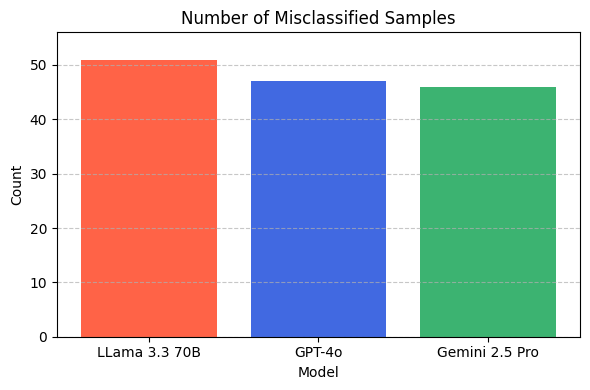

In [ ]:
plot_metric(misclassified, "Number of Misclassified Samples", "Count")


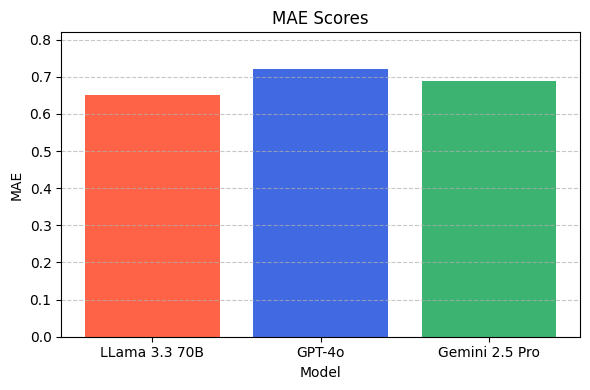

In [3]:
plot_metric(rmse_scores, "MAE Scores", "MAE")


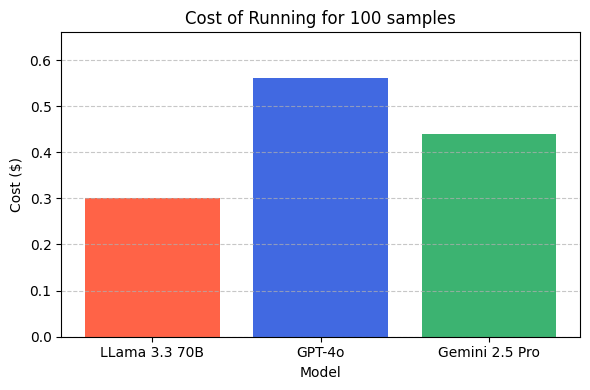

In [ ]:
plot_metric(costs, "Cost of Running for 100 samples", "Cost ($)")


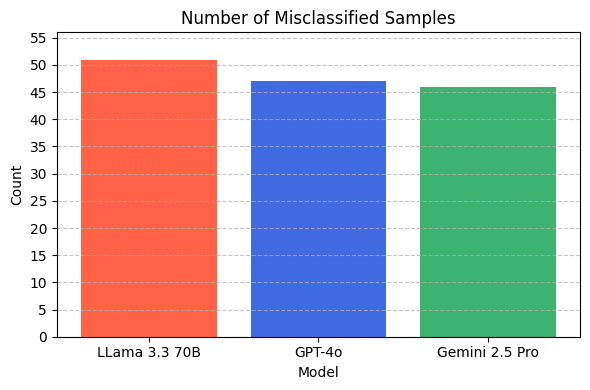

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ["LLama 3.3 70B", "GPT-4o", "Gemini 2.5 Pro"]

# Metrics
misclassified = [51, 47, 46]
rmse_scores = [0.65, 0.72, 0.69]
costs = [0.30, 0.56, 0.44]

# Colors
colors = ['tomato', 'royalblue', 'mediumseagreen']

# Function to plot bar chart with custom colors and optional y-tick intervals
def plot_metric(metric_values, title, ylabel, use_ytick_interval=False):
    plt.figure(figsize=(6, 4))
    plt.bar(models, metric_values, color=colors)
    plt.title(title)
    plt.ylabel(ylabel)
    plt.xlabel("Model")
    max_val = max(metric_values)
    plt.ylim(0, max_val + (0.1 if max_val < 5 else 5))
    if use_ytick_interval:
        ticks = np.arange(0, max_val + 6, 5)
        plt.yticks(ticks)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Plot 1: Misclassified Samples (with y-axis intervals of 5)
plot_metric(misclassified, "Number of Misclassified Samples", "Count", use_ytick_interval=True)


#**Experiment 3-Alignment Between Human and LLM-Generated Feedback**

In [ ]:
!pip install bert-score

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.1/61.1 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 60.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 24.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 885.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 70.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstallin

In [ ]:
LLM_explanations = [
    "The essay scores 0.5 for the introduction, as it briefly mentions the topic but lacks clarity. Logical claims earn 0.5, with weak points about natural causes. Evidence scores 0, as no article references are used. The conclusion is absent, earning 0. Overall, the essay lacks cohesion.",
    "The introduction gets 1 for mentioning the topic clearly. Logical claims score 1.5, referencing optical illusions. Evidence is strong with citations, earning 1.5 points. The conclusion is missing, earning 0 points. The essay shows structure but ends weakly.",
    "The introduction receives 0, as it does not properly set the stage. Logical claims score 1, pointing to natural formation ideas. Evidence is 0, since no citations are included. The conclusion scores 0.5, restating but not developing the point. Overall, cohesion is limited.",
    "The introduction earns 0.5, as it attempts to introduce the subject. Logical claims get 1 for suggesting meteorite impacts. Evidence scores 0, as the article is not used. The conclusion is missing, earning 0. The essay feels incomplete.",
    "The essay gets 1 for the introduction, as it clearly presents the issue. Logical claims score 1.5, citing illusions and new images. Evidence scores 1.5 with clear references. The conclusion earns 0. Overall, the essay is strong but unfinished.",
    "The introduction scores 0, as it is unclear. Logical claims earn 0.5, with underdeveloped points. Evidence scores 0, with no support. The conclusion scores 0, offering no closure. The structure is weak overall.",
    "The introduction scores 0.5, as it partially introduces the argument. Logical claims earn 1, pointing to shadows and erosion. Evidence is 0.5, with vague mention of sources. The conclusion is absent, earning 0 points. Overall, the essay is only partially effective.",
    "The essay gets 1 for the introduction, as it frames the debate. Logical claims earn 1, with some valid reasoning. Evidence scores 0, as sources are not cited. The conclusion earns 0.5, as it briefly restates the argument. The flow is uneven.",
    "The introduction scores 0.5, with minimal setup. Logical claims earn 0.5, mentioning weak natural formation points. Evidence scores 0. The conclusion scores 0, with no closure. Overall, the essay is unclear.",
    "The essay earns 1 for the introduction, as it states the issue. Logical claims score 1.5, presenting strong counter-arguments. Evidence earns 1, with one article mention. The conclusion scores 0, ending abruptly. Cohesion is partial.",
    "The introduction scores 0, with no clear opening. Logical claims earn 1, which are somewhat relevant. Evidence scores 0, as it is absent. The conclusion scores 0.5, providing only a vague summary. Overall, the structure is weak.",
    "The essay scores 1 for the introduction, giving context. Logical claims earn 1.5, with detailed explanations. Evidence earns 1.5, citing multiple article parts. The conclusion scores 0, as closure is missing. The structure is otherwise good.",
    "The introduction scores 0.5, as it is weakly phrased. Logical claims earn 0.5, with shallow reasoning. Evidence scores 0, as it is absent. The conclusion scores 0, since it is missing. The essay lacks clarity.",
    "The essay earns 0.5 for the introduction, as it mentions the topic briefly. Logical claims score 1, noting natural causes. Evidence earns 0.5, with unclear references. The conclusion scores 0. Overall, cohesion is limited.",
    "The introduction scores 1, as it is clear and relevant. Logical claims earn 1, with some explanation. Evidence scores 0, since no article is cited. The conclusion scores 0.5, weakly reinforcing the point. The essay shows partial structure.",
    "The introduction scores 0, as it is unfocused. Logical claims earn 0.5, which are poorly developed. Evidence scores 0. The conclusion scores 0, as it is missing. The essay fails to develop its ideas.",
    "The essay scores 0.5 for the introduction, as it sets up the topic slightly. Logical claims earn 1.5, with strong reasoning about illusions. Evidence earns 1, with partial citations. The conclusion scores 0. Overall, the structure is decent.",
    "The introduction scores 1, with a relevant opening. Logical claims earn 1.5, with detailed points. Evidence scores 1.5, as it is well cited. The conclusion scores 0.5, restating without depth. The essay is strong but lacks closing strength.",
    "The essay earns 0.5 for the introduction. Logical claims score 0.5, as they are vague. Evidence scores 0, since it is absent. The conclusion scores 0. Overall, the essay is weak.",
    "The introduction scores 1, as it is effective. Logical claims earn 1, with reasonable points. Evidence scores 0.5, with weak references. The conclusion scores 0, ending abruptly. The essay is partly effective."
]

human_explanations = [
    "The essay gets 0.5 for the introduction. It tries to bring up the topic but is not very clear. Logical points earn 0.5, since ideas like land formation are mentioned but not explained. No evidence is used, earning 0. The ending is not really a conclusion, so it earns 0. Overall, it feels incomplete.",
    "The introduction is fair and earns 1 point, as the topic is set up well. Logical claims are strong, earning 1.5, with examples about shadows. Evidence is good, scoring 1.5, since it refers to parts of the article. The conclusion does not tie everything together, earning 0. The essay is solid but unfinished.",
    "The start does not explain much, so it scores 0. Logical claims are fair, earning 1, with some relevant points. Evidence is missing, earning 0. The conclusion tries a little, scoring 0.5. Overall, the essay feels messy.",
    "The essay gives a small introduction that earns 0.5, but it is not strong. Logical claims are weak, earning 0.5. There is no evidence, so it scores 0. There is no conclusion, earning 0. The essay feels underdeveloped.",
    "The opening is clear and scores 1. Logical claims are strong, earning 1.5, with illusions and images explained. Evidence is solid, earning 1.5. There is no conclusion, earning 0. Overall, the essay is strong but ends suddenly.",
    "There is no proper introduction, earning 0. Logical reasoning is weak, scoring 0.5. No evidence is used, earning 0. No ending is present, so the conclusion scores 0. The essay does not hold together.",
    "The introduction is vague, scoring 0.5. Logical points are fair, earning 1. Evidence is thin, earning 0.5. There is no conclusion, scoring 0. The essay is partly developed but not enough.",
    "The opening sets up the issue and scores 1. Logical reasoning is fair, earning 1. Evidence is missing, scoring 0. The ending is short, scoring 0.5. The essay feels uneven overall.",
    "The introduction is brief, earning 0.5. Logical claims are weak, scoring 0.5. No evidence is used, earning 0. No ending is provided, so the conclusion scores 0. The essay feels lacking.",
    "The introduction is good and scores 1. The reasoning is clear, earning 1.5. One reference is included, scoring 1. The conclusion is missing, so it scores 0. Overall, the essay is fine but not properly closed.",
    "There is no clear introduction, so it scores 0. Somewhat relevant claims earn 1. No evidence is used, scoring 0. The conclusion is weak, scoring 0.5. Overall, the essay feels messy.",
    "The essay starts well, earning 1. Logical claims are strong, scoring 1.5. Evidence is also strong, scoring 1.5. The conclusion is not developed, so it earns 0. The essay is strong except for the end.",
    "The introduction is weak, scoring 0.5. Logical claims are poor, earning 0.5. No evidence is used, scoring 0. No conclusion is provided, earning 0. Overall, the essay feels unclear.",
    "The essay gives a small introduction, scoring 0.5. Some claims are included, scoring 1. Evidence is unclear, earning 0.5. The conclusion is missing, scoring 0. Overall, the essay feels incomplete.",
    "The start is acceptable, scoring 1. Logical claims are average, earning 1. Evidence is missing, scoring 0. The conclusion is weak, earning 0.5. The essay has poor structure.",
    "There is no real introduction, earning 0. Poor claims are included, earning 0.5. No evidence is used, earning 0. No conclusion is provided, earning 0. The essay is very weak.",
    "The introduction is brief, scoring 0.5. Strong claims are included, earning 1.5. Some evidence is present, scoring 1. The conclusion is missing, scoring 0. The essay is decent but incomplete.",
    "The introduction is good, earning 1. Reasoning is strong, scoring 1.5. Evidence is well cited, earning 1.5. The conclusion is weak, earning 0.5. Overall, the essay is strong but the ending is poor.",
    "The introduction is brief, scoring 0.5. The claims are vague, earning 0.5. No evidence is used, scoring 0. The conclusion is missing, earning 0. Overall, the essay is weak.",
    "The introduction is clear, scoring 1. The claims are fair, earning 1. Evidence is thin, scoring 0.5. The conclusion is abrupt, scoring 0. Overall, the essay is partly effective."
]


In [ ]:
P, R, F1 = score(LLM_explanations, human_explanations, lang="en", verbose=True)

# Print results for each pair
for i, (p, r, f) in enumerate(zip(P, R, F1), 1):
    print(f"Sentence pair {i} - Precision: {p:.4f}, Recall: {r:.4f}, F1: {f:.4f}")

# Print average scores
print(f"\nAverage Precision: {P.mean():.4f}")
print(f"Average Recall: {R.mean():.4f}")
print(f"Average F1 Score: {F1.mean():.4f}")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/482 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.42G [00:00<?, ?B/s]

Some weights of RobertaModel were not initialized from the model checkpoint at roberta-large and are newly initialized: ['pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


calculating scores...
computing bert embedding.


  0%|          | 0/1 [00:00<?, ?it/s]

computing greedy matching.


  0%|          | 0/1 [00:00<?, ?it/s]

done in 14.03 seconds, 0.21 sentences/sec
Sentence pair 1 - Precision: 0.9385, Recall: 0.9051, F1: 0.9215
Sentence pair 2 - Precision: 0.9192, Recall: 0.8939, F1: 0.9064
Sentence pair 3 - Precision: 0.9125, Recall: 0.8997, F1: 0.9061

Average Precision: 0.9234
Average Recall: 0.8996
Average F1 Score: 0.9113
